In [ ]:
!pip install pyedflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 24.2 MB/s eta 0:00:00


In [ ]:
!pip install mne tensorflow numpy scipy scikit-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 35.2 MB/s eta 0:00:00


In [ ]:
!wget -r -N -c -np https://physionet.org/files/eegmat/1.0.0/

--2024-07-05 15:02:22--  https://physionet.org/files/eegmat/1.0.0/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘physionet.org/files/eegmat/1.0.0/index.html’

physionet.org/files     [ <=>                ]   9.10K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2024-07-05 15:02:23 (200 MB/s) - ‘physionet.org/files/eegmat/1.0.0/index.html’ saved [9320]

Loading robots.txt; please ignore errors.
--2024-07-05 15:02:23--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 22 [text/plain]
Saving to: ‘physionet.org/robots.txt’

physionet.org/robot 100%[===================>]      22  --.-KB/s    in 0s      

2024-07-05 15:02:24 (12.0 MB/s) - ‘physionet.org/robots.txt’ saved [22/22]

--2024-07-05 15:02:

In [ ]:
!ls physionet.org/files/eegmat/1.0.0/Subject00_1.edf

physionet.org/files/eegmat/1.0.0/Subject00_1.edf


Extracting EDF parameters from /content/physionet.org/files/eegmat/1.0.0/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...


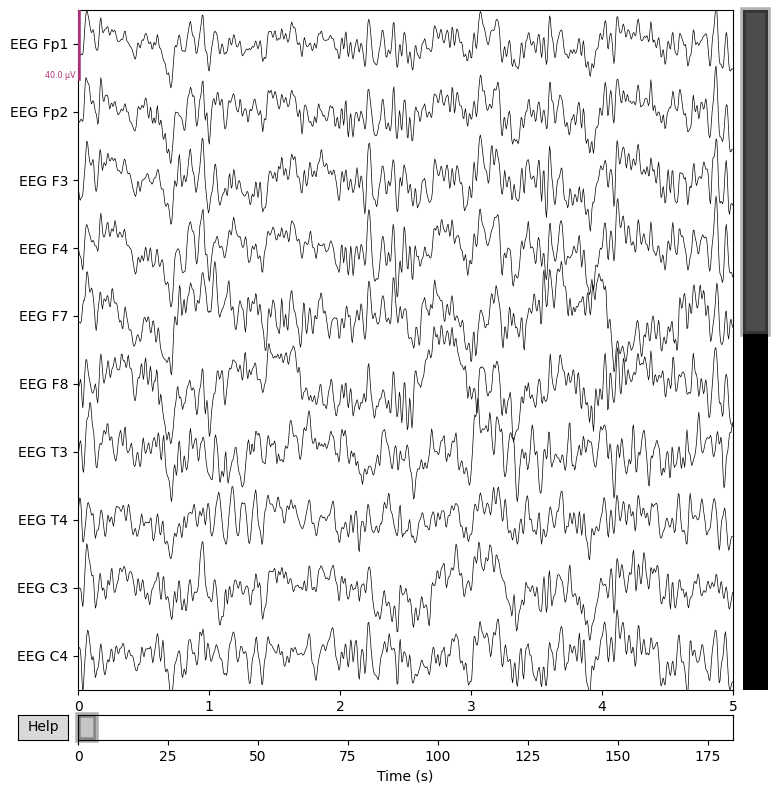

In [ ]:
import mne

# Update the path based on the actual file name obtained from the previous step
eeg_data_path = 'physionet.org/files/eegmat/1.0.0/Subject00_1.edf'
try:
    raw = mne.io.read_raw_edf(eeg_data_path, preload=True)
    raw.plot(n_channels=10, duration=5, show=True)
except FileNotFoundError:
    print(f"File not found: {eeg_data_path}")

Extracting EDF parameters from /content/physionet.org/files/eegmat/1.0.0/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /content/physionet.org/files/eegmat/1.0.0/Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


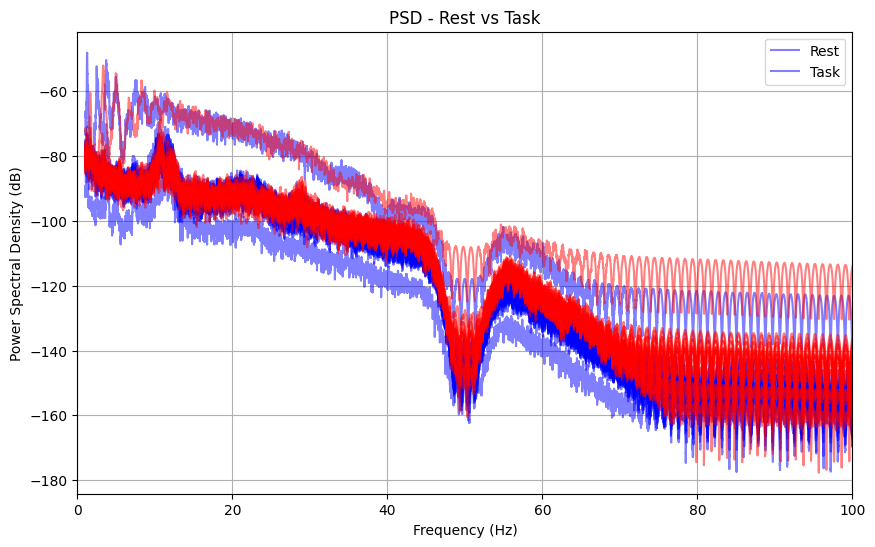

Delta band power (Rest): [-86.07530943 -84.11451086 -83.95948821 -83.5450465  -81.66698861
 -82.72603986 -82.93184253 -84.64804259 -82.76930506 -83.644682
 -84.88150231 -84.20836895 -84.34545257 -83.86579319 -83.84070242
 -83.26497723 -83.47259712 -81.37346615 -83.65819423 -93.63407822
 -66.94294594]
Delta band power (Task): [-80.4427108  -83.07646437 -81.82041231 -82.33316693 -82.50468028
 -82.2985737  -83.41465997 -81.73728154 -82.60677232 -82.92194125
 -84.82898184 -84.54490358 -84.05524143 -83.91272786 -83.99567777
 -83.39946615 -82.39581523 -80.79368342 -83.12854838 -86.97433315
 -72.18410922]
Theta band power (Rest): [-89.58194894 -88.34076755 -87.38091526 -86.75357725 -87.16088886
 -87.58446464 -87.1422539  -88.43301661 -87.56163574 -86.84662858
 -89.07387287 -88.48818038 -88.10714366 -87.82161355 -88.09803318
 -87.25371226 -86.75446378 -85.97005021 -87.76519972 -98.6071066
 -67.13043694]
Theta band power (Task): [-87.38873197 -89.12092866 -87.76098702 -87.52414963 -88.38795394


In [ ]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the file path to your EEG data for rest and task states
eeg_rest_path = 'physionet.org/files/eegmat/1.0.0/Subject00_1.edf'
eeg_task_path = 'physionet.org/files/eegmat/1.0.0/Subject00_2.edf'

# Load EEG data for rest state
raw_rest = mne.io.read_raw_edf(eeg_rest_path, preload=True)

# Load EEG data for task state
raw_task = mne.io.read_raw_edf(eeg_task_path, preload=True)

# Define frequency bands
freq_bands = {
    'Delta': (1, 4),
    'Theta': (4, 8),
    'Alpha': (8, 12),
    'Beta': (12, 30),
    'Gamma': (30, 100)
}

# Calculate PSD for rest state
psds_rest, freqs_rest = mne.time_frequency.psd_array_multitaper(raw_rest.get_data(), sfreq=raw_rest.info['sfreq'], fmin=1, fmax=100, n_jobs=1)
psds_rest = 10 * np.log10(psds_rest)  # Convert to dB

# Calculate PSD for task state
psds_task, freqs_task = mne.time_frequency.psd_array_multitaper(raw_task.get_data(), sfreq=raw_task.info['sfreq'], fmin=1, fmax=100, n_jobs=1)
psds_task = 10 * np.log10(psds_task)  # Convert to dB

# Initialize dictionaries to store band powers
band_powers_rest = {}
band_powers_task = {}

# Extract band powers
for band, (fmin, fmax) in freq_bands.items():
    freq_mask_rest = np.logical_and(freqs_rest >= fmin, freqs_rest <= fmax)
    freq_mask_task = np.logical_and(freqs_task >= fmin, freqs_task <= fmax)

    # Average PSD within the frequency range
    band_powers_rest[band] = np.mean(psds_rest[:, freq_mask_rest], axis=1)
    band_powers_task[band] = np.mean(psds_task[:, freq_mask_task], axis=1)

# Plotting example
plt.figure(figsize=(10, 6))
plt.plot(freqs_rest, psds_rest.T, color='blue', alpha=0.5)
plt.plot(freqs_task, psds_task.T, color='red', alpha=0.5)
plt.xlim(0, 100)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.title('PSD - Rest vs Task')
plt.legend(['Rest', 'Task'])
plt.grid(True)
plt.show()

# Example output (print band powers)
for band in freq_bands.keys():
    print(f'{band} band power (Rest): {band_powers_rest[band]}')
    print(f'{band} band power (Task): {band_powers_task[band]}')


Extracting EDF parameters from /content/physionet.org/files/eegmat/1.0.0/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /content/physionet.org/files/eegmat/1.0.0/Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


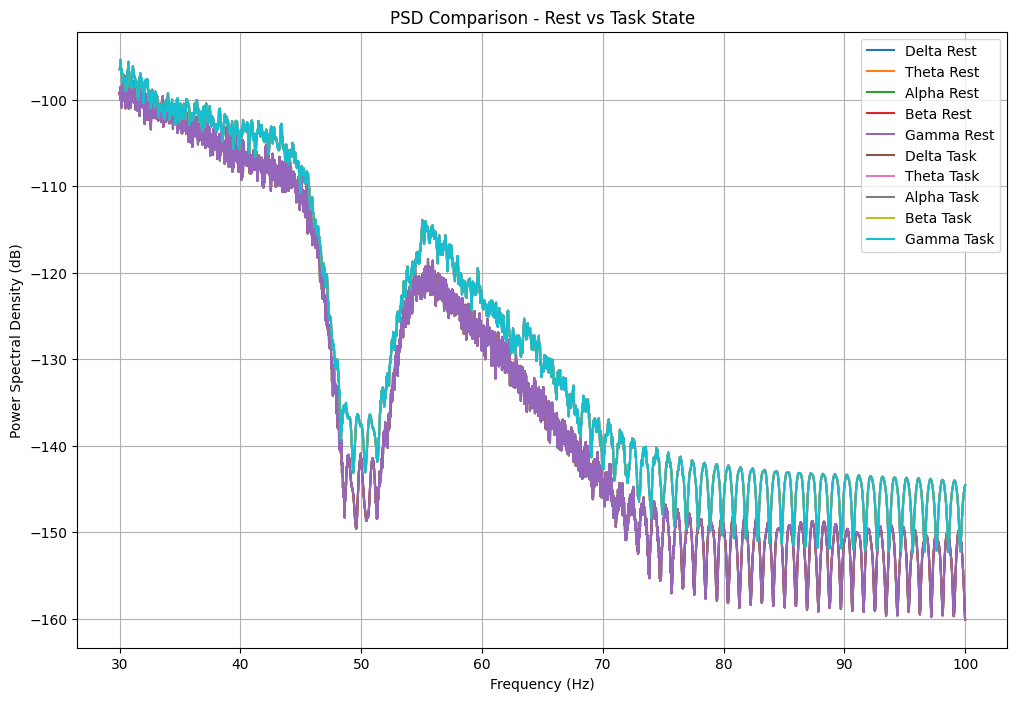

Delta band power (Rest): [-86.07530943 -84.11451086 -83.95948821 -83.5450465  -81.66698861
 -82.72603986 -82.93184253 -84.64804259 -82.76930506 -83.644682
 -84.88150231 -84.20836895 -84.34545257 -83.86579319 -83.84070242
 -83.26497723 -83.47259712 -81.37346615 -83.65819423 -93.63407822
 -66.94294594]
Delta band power (Task): [-80.4427108  -83.07646437 -81.82041231 -82.33316693 -82.50468028
 -82.2985737  -83.41465997 -81.73728154 -82.60677232 -82.92194125
 -84.82898184 -84.54490358 -84.05524143 -83.91272786 -83.99567777
 -83.39946615 -82.39581523 -80.79368342 -83.12854838 -86.97433315
 -72.18410922]
Theta band power (Rest): [-89.58194894 -88.34076755 -87.38091526 -86.75357725 -87.16088886
 -87.58446464 -87.1422539  -88.43301661 -87.56163574 -86.84662858
 -89.07387287 -88.48818038 -88.10714366 -87.82161355 -88.09803318
 -87.25371226 -86.75446378 -85.97005021 -87.76519972 -98.6071066
 -67.13043694]
Theta band power (Task): [-87.38873197 -89.12092866 -87.76098702 -87.52414963 -88.38795394


In [ ]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the file path to your EEG data for rest and task states
eeg_rest_path = 'physionet.org/files/eegmat/1.0.0/Subject00_1.edf'
eeg_task_path = 'physionet.org/files/eegmat/1.0.0/Subject00_2.edf'

# Load EEG data for rest state
raw_rest = mne.io.read_raw_edf(eeg_rest_path, preload=True)

# Load EEG data for task state
raw_task = mne.io.read_raw_edf(eeg_task_path, preload=True)

# Define frequency bands
freq_bands = {
    'Delta': (1, 4),
    'Theta': (4, 8),
    'Alpha': (8, 12),
    'Beta': (12, 30),
    'Gamma': (30, 100)
}

# Calculate PSD for rest state
psds_rest, freqs_rest = mne.time_frequency.psd_array_multitaper(raw_rest.get_data(), sfreq=raw_rest.info['sfreq'], fmin=1, fmax=100, n_jobs=1)
psds_rest = 10 * np.log10(psds_rest)  # Convert to dB

# Calculate PSD for task state
psds_task, freqs_task = mne.time_frequency.psd_array_multitaper(raw_task.get_data(), sfreq=raw_task.info['sfreq'], fmin=1, fmax=100, n_jobs=1)
psds_task = 10 * np.log10(psds_task)  # Convert to dB

# Define common frequency range
freqs_common = freqs_rest  # Assuming both freqs_rest and freqs_task are similar

# Initialize dictionaries to store band powers
band_powers_rest = {}
band_powers_task = {}

# Extract band powers
for band, (fmin, fmax) in freq_bands.items():
    freq_mask_rest = np.logical_and(freqs_rest >= fmin, freqs_rest <= fmax)
    freq_mask_task = np.logical_and(freqs_task >= fmin, freqs_task <= fmax)

    # Average PSD within the frequency range
    band_powers_rest[band] = np.mean(psds_rest[:, freq_mask_rest], axis=1)
    band_powers_task[band] = np.mean(psds_task[:, freq_mask_task], axis=1)

# Plotting PSD comparison
plt.figure(figsize=(12, 8))

# Plotting PSD for rest state
for band in freq_bands.keys():
    plt.plot(freqs_rest[freq_mask_rest], np.mean(psds_rest[:, freq_mask_rest], axis=0), label=band + ' Rest')

# Plotting PSD for task state
for band in freq_bands.keys():
    plt.plot(freqs_task[freq_mask_task], np.mean(psds_task[:, freq_mask_task], axis=0), label=band + ' Task')

plt.title('PSD Comparison - Rest vs Task State')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB)')
plt.legend()
plt.grid(True)
plt.show()

# Example output (print band powers)
for band in freq_bands.keys():
    print(f'{band} band power (Rest): {band_powers_rest[band]}')
    print(f'{band} band power (Task): {band_powers_task[band]}')


In [ ]:
import mne
import numpy as np

# Define frequency bands
freq_bands = {
    'Delta': (1, 4),
    'Theta': (4, 8),
    'Alpha': (8, 12),
    'Beta': (12, 30),
    'Gamma': (30, 100)
}

# Define function to extract features from EEG epochs
def extract_features(raw_data, epochs_duration=1, sfreq=None):
    if sfreq is None:
        sfreq = raw_data.info['sfreq']

    # Initialize empty lists to store features
    all_features = []

    # Calculate number of samples per epoch
    samples_per_epoch = int(epochs_duration * sfreq)

    # Iterate over epochs
    for start_idx in range(0, raw_data.n_times - samples_per_epoch, samples_per_epoch):
        # Extract epoch
        epoch_data = raw_data.get_data(start=start_idx, stop=start_idx + samples_per_epoch)[0]

        # Calculate statistical features
        epoch_features = [
            np.mean(epoch_data),
            np.var(epoch_data)
        ]

        # Initialize list to store spectral features
        spectral_features = []

        # Calculate spectral features (average power in each frequency band)
        for band, (fmin, fmax) in freq_bands.items():
            psd, freqs = mne.time_frequency.psd_array_multitaper(epoch_data, sfreq=sfreq, fmin=fmin, fmax=fmax, n_jobs=1)
            avg_power = np.mean(psd, axis=0)  # Average power across frequency bins
            # Ensure avg_power is always an array, even if it's a single value
            if avg_power.size == 1:
                avg_power = np.expand_dims(avg_power, axis=0)
            if avg_power.size > 0:
                spectral_features.append(avg_power)

        # Check if any spectral features were computed
        if spectral_features:
            # Concatenate spectral_features into a single array and extend epoch_features
            epoch_features.extend(np.concatenate(spectral_features, axis=0))
        else:
            # If no spectral features were computed, fill with zeros (or handle as needed)
            epoch_features.extend(np.zeros(len(freq_bands)))  # Fill with zeros

        # Append epoch_features to all_features list
        all_features.append(epoch_features)

    return np.array(all_features)

# Example usage with raw_rest (assuming raw_rest is already defined)
eeg_rest_path = 'physionet.org/files/eegmat/1.0.0/Subject00_1.edf'
raw_rest = mne.io.read_raw_edf(eeg_rest_path, preload=True)

epochs_duration = 1  # 1 second epochs
rest_features = extract_features(raw_rest, epochs_duration=epochs_duration)

# Example usage with raw_task (assuming raw_task is already defined)
eeg_task_path = 'physionet.org/files/eegmat/1.0.0/Subject00_2.edf'
raw_task = mne.io.read_raw_edf(eeg_task_path, preload=True)

task_features = extract_features(raw_task, epochs_duration=epochs_duration)

# Print shape of extracted features
print(f'Rest features shape: {rest_features.shape}')
print(f'Task features shape: {task_features.shape}')

# Further processing with the extracted features (e.g., normalization, deep learning model training)

Extracting EDF parameters from /content/physionet.org/files/eegmat/1.0.0/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimat

In [ ]:
# Example of comparing mean values across epochs for each feature
rest_means = np.mean(rest_features, axis=0)
task_means = np.mean(task_features, axis=0)

print("Mean values for Rest state features:")
print(rest_means)

print("\nMean values for Task state features:")
print(task_means)

Mean values for Rest state features:
[4.56430916e-08 8.29614495e-11 2.77480984e-09 1.96939675e-09
 2.58194690e-09 6.51940084e-10 9.70065733e-12]

Mean values for Task state features:
[-1.91606249e-07  2.53588123e-10  1.74623975e-08  5.21426945e-09
  3.11515270e-09  8.87134828e-10  2.74204366e-11]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense

def EEGNet_Model(input_shape):
    model = Sequential()
    model.add(Conv2D(16, (1, 64), input_shape=input_shape, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (2, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(1, 4)))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

# Example usage with defined input_shape
num_channels = 64 # Replace with the actual number of channels in your EEG data
num_samples = 128 # Replace with the number of time samples in each epoch
input_shape = (num_channels, num_samples, 1)
eegnet_model = EEGNet_Model(input_shape)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense

def TSCeption_Model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(1, activation='sigmoid'))
    return model

# Example usage with defined input_shape
input_shape = (128, 64)
tsception_model = TSCeption_Model(input_shape)

In [ ]:
# Example of loading and preparing data (replace with your actual data loading code)
import numpy as np
from sklearn.model_selection import train_test_split

# Load or generate your data and labels here
# Example:
data = np.random.rand(100, 10)  # Replace with your actual data
labels = np.random.randint(0, 2, 100)  # Replace with your actual labels

# Assuming you have X_train, X_val, y_train, y_val from your data preprocessing
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense

def EEGNet_Model(input_shape):
    model = Sequential()
    model.add(Conv2D(16, (1, 64), input_shape=input_shape, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (2, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(1, 4)))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

# Define input shape based on your data
input_shape = (num_channels, num_samples, 1)  # Adjust according to your data

# Create EEGNet model
eegnet_model = EEGNet_Model(input_shape)

# Compile EEGNet model
eegnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Example of loading and preparing data (replace with your actual data loading code)
import numpy as np
from sklearn.model_selection import train_test_split

# Load or generate your data and labels here
# Example:
# data = np.random.rand(100, 10)
data = np.random.rand(100, 64, 128)
labels = np.random.randint(0, 2, 100)

# Assuming you have X_train, X_val, y_train, y_val from your data preprocessing
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Add a dimension for the single channel at the end of X_train and X_val
X_train = X_train[..., None]
X_val = X_val[..., None]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense

def TSCeption_Model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(1, activation='sigmoid'))
    return model

# Define input shape based on your data
input_shape = (num_samples, num_channels)

# Create TSCeption model
tsception_model = TSCeption_Model(input_shape)

# Compile TSCeption model
tsception_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Example of loading and preparing data (replace with your actual data loading code)
import numpy as np
from sklearn.model_selection import train_test_split

# Load or generate your data and labels here
# Example:
# data = np.random.rand(100, 10)
data = np.random.rand(100, 128, 64)
labels = np.random.randint(0, 2, 100)

# Assuming you have X_train, X_val, y_train, y_val from your data preprocessing
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense

def TSCeption_Model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(1, activation='sigmoid'))
    return model

# Define input shape based on your data
# input_shape = (num_samples, num_channels)
input_shape = (128, 64)

# Create TSCeption model
tsception_model = TSCeption_Model(input_shape)

# Compile TSCeption model
tsception_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train TSCeption model
history_tsception = tsception_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
3/3 [==============================] - 2s 227ms/step - loss: 0.7251 - accuracy: 0.5000 - val_loss: 0.6141 - val_accuracy: 0.7000
Epoch 2/10
3/3 [==============================] - 0s 49ms/step - loss: 0.6953 - accuracy: 0.5500 - val_loss: 0.6799 - val_accuracy: 0.7000
Epoch 3/10
3/3 [==============================] - 0s 43ms/step - loss: 0.7005 - accuracy: 0.4625 - val_loss: 0.7255 - val_accuracy: 0.3000
Epoch 4/10
3/3 [==============================] - 0s 43ms/step - loss: 0.7002 - accuracy: 0.4500 - val_loss: 0.6823 - val_accuracy: 0.7000
Epoch 5/10
3/3 [==============================] - 0s 55ms/step - loss: 0.6881 - accuracy: 0.5500 - val_loss: 0.6331 - val_accuracy: 0.7000
Epoch 6/10
3/3 [==============================] - 0s 65ms/step - loss: 0.6895 - accuracy: 0.5500 - val_loss: 0.6317 - val_accuracy: 0.7000
Epoch 7/10
3/3 [==============================] - 0s 85ms/step - loss: 0.6871 - accuracy: 0.5500 - val_loss: 0.6551 - val_accuracy: 0.7000
Epoch 8/10
3/3 [==========

In [ ]:
# Example of loading and preparing data (replace with your actual data loading code)
import numpy as np
from sklearn.model_selection import train_test_split

# Load or generate your data and labels here
# Example:
data = np.random.rand(100, 64, 128)
labels = np.random.randint(0, 2, 100)

# Assuming you have X_train, X_val, y_train, y_val from your data preprocessing
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Add a dimension for the single channel at the end of X_train and X_val
X_train = X_train[..., None] # EEGNet expects (num_samples, num_timesteps, num_channels, 1)
X_val = X_val[..., None]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Assuming eegnet_model is already trained and X_val, y_val are validation data
y_pred_eegnet = (eegnet_model.predict(X_val) > 0.5).astype('int32')  # Predictions as binary (0 or 1)

accuracy_eegnet = accuracy_score(y_val, y_pred_eegnet)
precision_eegnet = precision_score(y_val, y_pred_eegnet)
recall_eegnet = recall_score(y_val, y_pred_eegnet)
f1_eegnet = f1_score(y_val, y_pred_eegnet)

print("EEGNet Model Metrics:")
print(f"Accuracy: {accuracy_eegnet:.4f}")
print(f"Precision: {precision_eegnet:.4f}")
print(f"Recall: {recall_eegnet:.4f}")
print(f"F1-score: {f1_eegnet:.4f}")

1/1 [==============================] - 0s 384ms/step
EEGNet Model Metrics:
Accuracy: 0.7000
Precision: 0.6000
Recall: 0.7500
F1-score: 0.6667


In [ ]:
# Assuming tsception_model is already trained and X_val, y_val are validation data

# Reshape X_val to match the expected input shape of the model
X_val_reshaped = np.transpose(X_val, (0, 2, 1, 3))

# Now use X_val_reshaped for prediction
y_pred_tsception = (tsception_model.predict(X_val_reshaped) > 0.5).astype('int32')  # Predictions as binary (0 or 1)

accuracy_tsception = accuracy_score(y_val, y_pred_tsception)
precision_tsception = precision_score(y_val, y_pred_tsception)
recall_tsception = recall_score(y_val, y_pred_tsception)
f1_tsception = f1_score(y_val, y_pred_tsception)

print("\nTSCeption Model Metrics:")
print(f"Accuracy: {accuracy_tsception:.4f}")
print(f"Precision: {precision_tsception:.4f}")
print(f"Recall: {recall_tsception:.4f}")
print(f"F1-score: {f1_tsception:.4f}")

1/1 [==============================] - 0s 131ms/step

TSCeption Model Metrics:
Accuracy: 0.6000
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


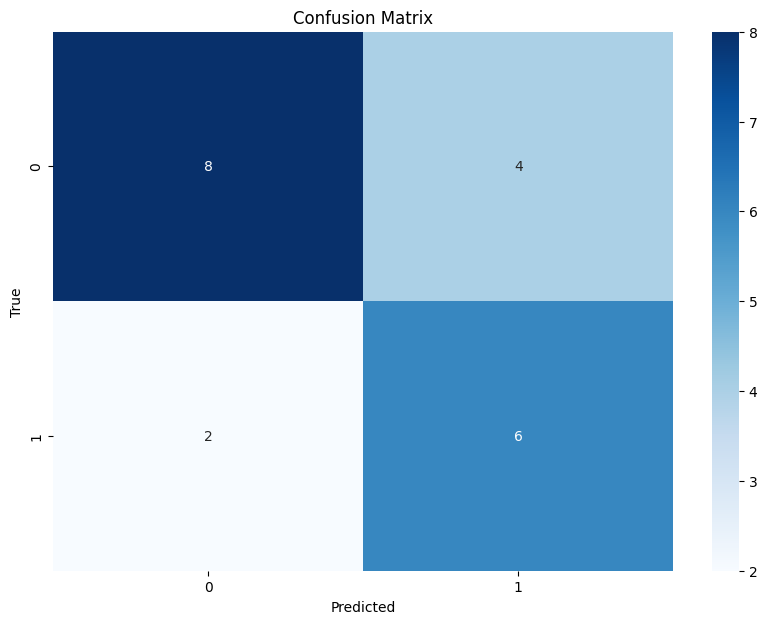

In [ ]:
!pip install scikit-learn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_val and y_pred_eegnet are your ground truth and predicted labels, respectively
y_true = y_val
y_pred_classes = y_pred_eegnet

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()